In [13]:
import tensorflow as tf

from smot.jupyter import model_reports
from smot.problems.mnist.LeNet5 import lenet5_lib

In [14]:
# Load (and cache) standard MNIST dataset.
(x_train, y_train), (x_test, y_test) = lenet5_lib.load_LeNet5_datasets()

Model: "LeNet5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_26 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_27 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_40 (Dense)             (None, 84)                10164

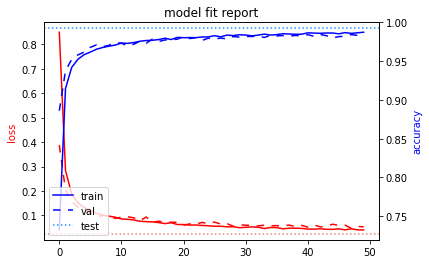

In [19]:
model = lenet5_lib.build_LeNet5_model()

# Print the model summary.
model.summary()

batch_size = 128
validation_split=0.2
epochs = 50

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
  rotation_range=10,
  shear_range=0.1,
  width_shift_range=0.1,
  height_shift_range=0.1,
  zoom_range=0.2,
  validation_split=validation_split,
)
datagen.fit(x_train)

training_generator = datagen.flow(
  x_train,
  y_train,
  subset='training',
  batch_size=batch_size,
)
validation_generator = datagen.flow(
  x_train,
  y_train,
  subset='validation',
  batch_size=batch_size,
)

history = model.fit(
  training_generator,
  validation_data=validation_generator,
  epochs=epochs,
  verbose=1,
)

# Evaluate the model with the test data.
test_loss, test_accuracy = model_reports.model_fit_report(
  model=model,
  history=history,
  test_data=(x_test, y_test),
)